In [1]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# train url : https://drive.google.com/file/d/1VbrbKej34hT-8P3kGIb66-4g-HZQACel/view?usp=sharing
# test url : https://drive.google.com/file/d/1n5YQXY4jy5scMTWAQoHC28dvA1DfwE25/view?usp=sharing
download = drive.CreateFile({"id": "1VbrbKej34hT-8P3kGIb66-4g-HZQACel"}) #이부분 수정하면 됩니당
download.GetContentFile("ggstore_train.csv")
download = drive.CreateFile({"id": "1n5YQXY4jy5scMTWAQoHC28dvA1DfwE25"}) #이부분 수정하면 됩니당
download.GetContentFile("ggstore_test.csv")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 사용할 데이터는 구글 어플 데이터 입니다. 구성된 Feature는 다음과 같습니다.

App - 어플명
Category - 어플 카테고리
Reviews -리뷰개수
Size - 어플크기
Installs - 다운로드 횟수
Type - 무료0/유료1
Price - 가격
Content Rating - 연령제한
Genres - 세부장르
Last Updated - 마지막 업데이트
이를 통해 Target 변수 평점을 예측합니다.

Rating - 평점

In [4]:
train = pd.read_csv('ggstore_train.csv', index_col='Id')
test = pd.read_csv('ggstore_test.csv', index_col='Id')

In [ ]:
train.shape, test.shape

((5616, 11), (1404, 10))

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
Id,,,,,,,,,,
5617,Dr.Android Repair Master 2017,PRODUCTIVITY,1205,4.3,100000.0,0,0.00,Everyone,Productivity,2018-06-10
5618,DR CONTROL,FAMILY,267,1.5,10000.0,0,0.00,Everyone,Entertainment,2017-03-08
5619,Dr Driving Racer,GAME,183,68.0,10000.0,0,0.00,Everyone,Racing,2018-06-14
5620,Dr. McDougall Mobile Cookbook,HEALTH_AND_FITNESS,76,1.2,1000.0,1,4.99,Everyone,Health & Fitness,2015-01-26
5621,Dr. Seuss's ABC,FAMILY,429,12.0,10000.0,1,3.99,Everyone,Books & Reference;Education,2018-02-26


In [ ]:
# train_L = train['Last Updated'].copy()

In [ ]:
# train_L.

<bound method NDFrame.describe of Id
0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
5611    2018-01-14
5612    2017-12-17
5613    2018-02-28
5614    2018-04-30
5615    2018-07-23
Name: Last Updated, Length: 5616, dtype: object>

In [ ]:
# data = pd.concat([train, test], axis = 0)
# train.append(test)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7020 entries, 0 to 7020
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7020 non-null   object 
 1   Category        7020 non-null   object 
 2   Rating          5616 non-null   float64
 3   Reviews         7020 non-null   int64  
 4   Size            7020 non-null   float64
 5   Installs        7020 non-null   float64
 6   Type            7020 non-null   int64  
 7   Price           7020 non-null   float64
 8   Content Rating  7020 non-null   object 
 9   Genres          7020 non-null   object 
 10  Last Updated    7020 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 658.1+ KB


In [ ]:
data.describe()

,Rating,Reviews,Size,Installs,Type,Price
count,5616.000000,7.020000e+03,7020.000000,7.020000e+03,7020.000000,7020.000000
mean,4.177386,1.449150e+05,21.765506,4.472298e+06,0.076781,1.174389
std,0.543153,1.024500e+06,22.732280,2.715099e+07,0.266262,18.206646
min,1.000000,1.000000e+00,0.008500,1.000000e+00,0.000000,0.000000
25%,4.000000,8.400000e+01,4.900000,1.000000e+04,0.000000,0.000000
50%,4.300000,1.545500e+03,13.000000,1.000000e+05,0.000000,0.000000
75%,4.500000,2.659050e+04,31.000000,1.000000e+06,0.000000,0.000000
max,5.000000,4.489172e+07,100.000000,1.000000e+09,1.000000,400.000000


# 2. Exploratory Data Analysis
- 데이터의 Feature 확인과 함께 어떠한 값을 가지는지 확인
- 해당 데이터로 파악한 내용을 시각화 하여 논리적으로 맞는지 확인
- 그 밖에 본인의 Insight를 가지고 시각화 해 봅시다.

In [ ]:
#결측치 확인
data.isnull().sum()

App                  0
Category             0
Rating            1404
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

In [ ]:
# 결측치 막대그래프
df.isnull().sum().plot.barh(figsize=(10,9))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


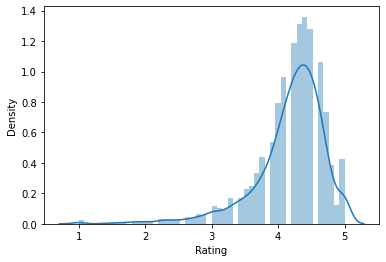

count    5616.000000
mean        4.177386
std         0.543153
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


In [ ]:
# Rating 분포 확인
sns.distplot(data['Rating'])
plt.show()
print(data['Rating'].describe())

In [ ]:
## 범주형 자료 확인
## 각 범주형 열마다 빈도수 높은 10개, 낮은 10개, 유니크한 개수를 알아본다.
discrete = ['Category', 'Content Rating', 'Genres']
for col in discrete:
    display(data[col].value_counts().head(10))
    display(data[col].value_counts().tail(10))
    print(data[col].nunique())
    print("*"*100)
    print("\t")

FAMILY             1510
GAME                832
TOOLS               625
PERSONALIZATION     274
LIFESTYLE           269
MEDICAL             266
FINANCE             258
PRODUCTIVITY        223
BUSINESS            222
SPORTS              221
Name: Category, dtype: int64

ENTERTAINMENT         64
AUTO_AND_VEHICLES     63
LIBRARIES_AND_DEMO    60
ART_AND_DESIGN        58
WEATHER               50
HOUSE_AND_HOME        50
COMICS                47
PARENTING             44
EVENTS                38
BEAUTY                37
Name: Category, dtype: int64

33
****************************************************************************************************
	


Everyone           5676
Teen                778
Mature 17+          304
Everyone 10+        259
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

Everyone           5676
Teen                778
Mature 17+          304
Everyone 10+        259
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

6
****************************************************************************************************
	


Tools              625
Entertainment      417
Education          391
Action             276
Personalization    274
Lifestyle          268
Medical            266
Finance            258
Sports             227
Productivity       223
Name: Genres, dtype: int64

Role Playing;Brain Games                 1
Travel & Local;Action & Adventure        1
Health & Fitness;Education               1
Video Players & Editors;Creativity       1
Video Players & Editors;Music & Video    1
Music & Audio;Music & Video              1
Racing;Pretend Play                      1
Adventure;Education                      1
Casual;Music & Video                     1
Strategy;Education                       1
Name: Genres, dtype: int64

111
****************************************************************************************************
	


In [ ]:
# 매우 적게 등장하는 값들이 많이 존재한다. 5번 이하로 등장하는 값들은 `_OTHERS`로 바꿔준다.
for col in discrete:
    val_counts = data[col].value_counts()
    data[col] = data[col].apply(lambda x: x if val_counts.loc[x] > 5 else '_OTHERS')

In [ ]:
data.head()
#데이터 확인

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
Id,,,,,,,,,,,
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,0,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,0,0.0,Everyone,_OTHERS,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,0,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,0,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,0,0.0,Everyone,_OTHERS,2018-06-20


# 잘 보기

In [ ]:
del_features = ['App', 'Type', 'Last Updated']
# 해당 Feature는 버려줍니다. 그러나 성능을 올려야 한다면 전처리를 통해 Feature를 만들어 보시기 바랍니다.
# 가이드라인에서는 버리도록 하겠습니다.
data.drop(columns = del_features, inplace = True)

In [ ]:
# Data Type확인
data.dtypes

# 3개의 범주형 변수와
# 4개의 연속형 변수를 갖고 있습니다.

In [ ]:
# Data Type확인
data.dtypes

# 3개의 범주형 변수와
# 4개의 연속형 변수를 갖고 있습니다.

In [ ]:
# 변수의 Scale이 모두 달라 y에 미치는 영향도가 다르므로 Min-Max Scaling을 진행합니다.
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = pd.DataFrame(scale.fit_transform(X), columns=X.columns)

In [ ]:
##Data Split
## Train Data와 Test Data를 구성합slek.
X_train = X.iloc[:len(train),:]
y_train = train['Rating']

X_test = X.iloc[len(train):,:]

X_train.shape, y_train.shape

# 3. Modeling : Regression
- Linear regression, Ridge, Lasso
- KNN
- 각각의 Hyperparaparameter를 튜닝시켜 가장 좋은 성능 모델로 Test를 진행하여 체점을 진행해보겠습니다.

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# 3.2 Hyper-parameter Searching
- Grid Search 방법을 진행합니다. (설정한 모든 경우의 조합으로 성능을 평가함.)
- 이를 5-Fold Cross Validation을 통해 가장 좋았던 파라미터를 찾습니다.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
algorithmes = [LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(n_jobs=-1), DecisionTreeRegressor()]
params = []

params.append({
    "fit_intercept" : [True]}) #Linear Regression 하이퍼 파라미터

params.append({
    "alpha" : [0.1,  5.0, 7.0, 10.0, 15.0, 20.0, 100.0]}) #Lasso 하이퍼 파라미터

params.append({
    "alpha" : [0.1,  5.0, 7.0, 10.0, 15.0, 20.0, 100.0]}) #Ridge 하이퍼 파라미터

params.append({
    "p":[int(i) for i in range(1,3)],
    "n_neighbors":[i for i in range(2, 5)]}) #KNN 하이퍼 파라미터

params.append({
    "criterion" : ["mse"],
    "max_depth" : [10,8,7,6,5,4,3,2],
    "min_samples_leaf": [1,2,3,4,5,6,7,8,9]}) #Decision Tree 하이퍼 파라미터

In [ ]:
scoring = ['neg_mean_squared_error']
estimator_results = []
for i, (estimator, params) in enumerate(zip(algorithmes,params)):
    gs_estimator = GridSearchCV(
            refit="neg_mean_squared_error", estimator=estimator, param_grid=params, scoring=scoring, cv=5, verbose=1, n_jobs=4)
    print(gs_estimator)

    gs_estimator.fit(X_train, y_train)
    estimator_results.append(gs_estimator)

In [ ]:
print("Linear Regression 가장 좋은 성능 : ", estimator_results[0].best_score_)
print("Ridge 가장 좋은 성능 : ", estimator_results[1].best_score_)
print("Lasso 가장 좋은 성능 : ", estimator_results[2].best_score_)
print("KNN 가장 좋은 성능 : ", estimator_results[3].best_score_)
print("Decision Tree가장 좋은 성능 : ", estimator_results[4].best_score_)

In [ ]:
# Decsion Tree를 통한 가장 좋은 Feature 확인
 

feature_name = X_train.columns.to_numpy()

print("Coefficient가 가장 큰 30개의 Feature 확인")
feature_name[estimator_results[4].best_estimator_.feature_importances_.argsort()[::-1]][:30]

# 3.3 Final Model Training
- 가장 좋은 Model과 Hyperparameter를 통해 Train set 전체를 학습시켜 최종적인 Test set을 예측합니다.



In [ ]:
final_model = estimator_results[4].best_estimator_
final_model.fit(X_train, y_train)

# 3.4 예측 결과를 통한 제출 파일 만들어 제출하기
- Id, Rating로 구성된 dataframe을 만들어 제출합니다.

In [ ]:
y_pred = final_model.predict(X_test).astype("float")
y_pred = np.round(y_pred,1)

In [ ]:
result = pd.DataFrame()
result['Id'] = test.index
result['Rating'] = y_pred

In [ ]:
result.to_csv("submission_result.csv",index=False)

In [ ]:
# 데이터 저장 경로는 왼쪽에서 확인 가능하며 /content/에 저장돼 있습니다.
# 해당 방법과 같이 파일을 로컬로 다운로드하시고 제출하시면 됩니다.